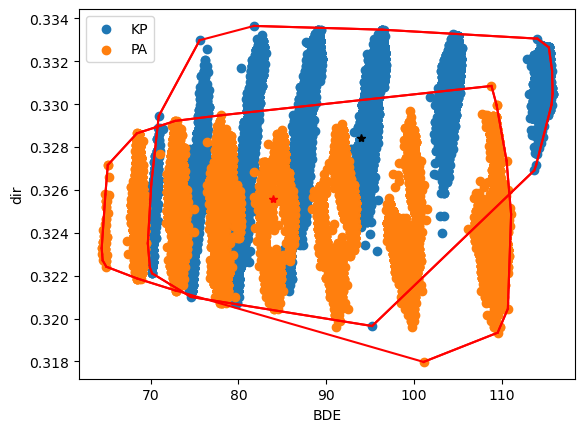

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull
df=pd.read_csv('masterData_2024_10_04.csv')
# Sample dataset
bacteria_colors = {'EC': 'blue', 'SA': 'green', 'PA': 'red', 'KP': 'black', 'SM': 'purple', 'SE': 'brown','ECSA':'orange','PASE':'cyan','SMKP':'teal','LM':'pink'}
dfX=df[(df['bacteria']=="KP")|(df['bacteria']=="PA")]
dfX=dfX[(dfX['slide']=="S3")]
dfX=dfX[dfX['Pow']>=0.05]
dfX['mag'] = np.sqrt(dfX['Ypos']**2 + dfX['Xpos']**2)
dfX['dir'] = np.arctan2(dfX['Ypos'], dfX['Xpos'])
dfX['BDE'] =dfX['mag'] / dfX['Pow']
plt.figure()
for i in dfX['bacteria'].unique():
    df2=dfX[dfX['bacteria']==i]
    X = df2['BDE'].values
    Y = df2['dir'].values
    points = np.column_stack((X, Y))
    # Plot the data points
    plt.scatter(X, Y,label=i)

    # Compute the convex hull
    hull = ConvexHull(points)

    # Draw the convex hull as a closed loop
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'r-')

    # Close the loop
    plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'r-')
    plt.plot(df2['BDE'].mean(),df2['dir'].mean(),marker='*',color=bacteria_colors[i])

plt.legend()
plt.xlabel('BDE')
plt.ylabel('dir')
    # Show plot
plt.show()

In [11]:
bacteria_colors = {'EC': 'blue', 'SA': 'green', 'PA': 'red', 'KP': 'black', 'SM': 'purple', 'SE': 'brown','ECSA':'orange','PASE':'cyan','SMKP':'teal','LM':'pink'}

def features_creator(averaged_data):
    print(averaged_data.head())
    averaged_data['Mag'] = np.sqrt(averaged_data['Ypos']**2 + averaged_data['Xpos']**2)
    averaged_data['BDE'] =averaged_data['Mag'] / averaged_data['Pow']
    averaged_data['dir'] = np.arctan2(averaged_data['Ypos'], averaged_data['Xpos'])
    averaged_data['SIV'] = averaged_data.groupby(['bacteria'])['Pow'].transform(np.std)
    center_x, center_y = averaged_data['Xpos'].mean(), averaged_data['Ypos'].mean()
    averaged_data['SCD'] = np.sqrt((averaged_data['Xpos'] - center_x) ** 2 + (averaged_data['Ypos'] - center_y) ** 2)
    averaged_data['AoS'] = np.arctan2(averaged_data['Ypos'] - center_y, averaged_data['Xpos'] - center_x)
    psi_values = averaged_data.groupby('bacteria')['Pow'].max()
    averaged_data['PSI'] = averaged_data['bacteria'].map(psi_values)
    msa_values = averaged_data.groupby('bacteria')['dir'].mean()
    averaged_data['MSA'] = averaged_data['bacteria'].map(msa_values)
    tsp_values = averaged_data.groupby('bacteria')['Pow'].sum()
    averaged_data['TSP'] = averaged_data['bacteria'].map(tsp_values)
    ssi_values = averaged_data.groupby('bacteria').apply(lambda x: abs(x['Pow'] - x['Pow'].iloc[::-1]).mean())
    averaged_data['SSI'] = averaged_data['bacteria'].map(ssi_values)
    se_values = averaged_data.groupby('bacteria')['Pow'].apply(lambda x: stats.entropy(x))
    averaged_data['SE'] = averaged_data['bacteria'].map(se_values)
    sa_values = averaged_data.groupby('bacteria').apply(calculate_sa)
    averaged_data['SA'] = averaged_data['bacteria'].map(sa_values)
    return averaged_data

def data_split_group(data,bact):
    data1=data[data['bacteria'].isin(bact)]
    return data1

def determine_d_t(bacteria_list):
    if all(bacteria in ["SA", "SE", "SM"] for bacteria in bacteria_list) and len(bacteria_list) > 0:
        d_t = "gp_data"
    elif all(bacteria in ["EC", "PA", "KP"] for bacteria in bacteria_list) and len(bacteria_list) > 0:
        d_t = "gn_data"
    elif all(bacteria in ["ECSA", "SMKP", "PASE"] for bacteria in bacteria_list) and len(bacteria_list) > 0:
        d_t = "com_data"
    else:
        d_t = "cus_data"
    return d_t

def calculate_sa(group):
    max_intensity = group['Pow'].max()
    min_intensity = group['Pow'].min()
    mean_intensity = group['Pow'].mean()
    
    # Calculate SA
    if mean_intensity != 0:
        return (max_intensity - min_intensity) / mean_intensity
    else:
        return np.nan

gp_data
   Samples      Xpos      Ypos       Pow  NebMode bacteria  concentration  \
0        0  4.153889  1.324269  0.313907        0       KP            0.2   
1        1  4.153889  1.319174  0.313907        0       KP            0.2   
2        2  4.153889  1.324269  0.313907        0       KP            0.2   
3        3  4.159004  1.324269  0.313907        0       KP            0.2   
4        4  4.159004  1.324269  0.313907        0       KP            0.2   

   volume slide trial  
0       1    C1    T1  
1       1    C1    T1  
2       1    C1    T1  
3       1    C1    T1  
4       1    C1    T1  


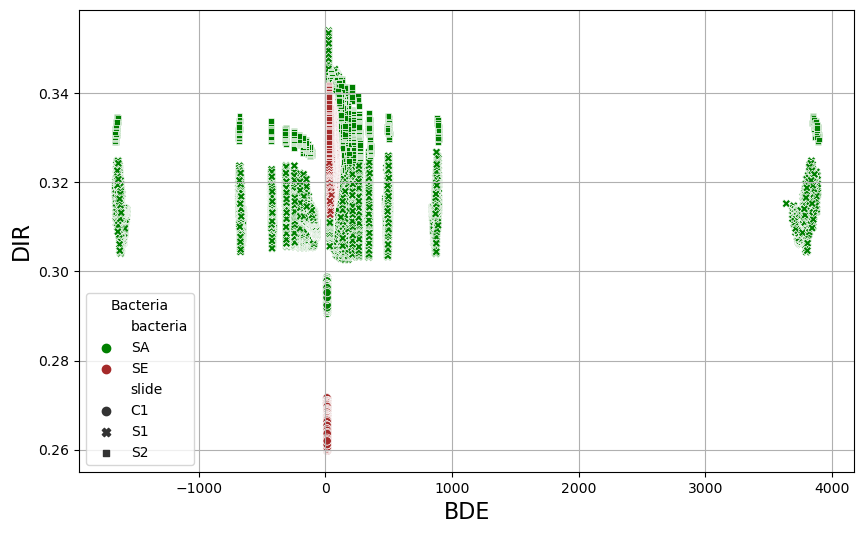

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats 
vol=[1,20]
conc=0.2
slide=['S1','S2','C1']
df=pd.read_csv(r'C:\Users\kurra\OneDrive\Desktop\DICE\PRANAS_Website\Data_files\raw_data\masterData_2024_10_04.csv')
fol="plots/raw_plots"
bacts=['SA','SE']
data_type=determine_d_t(bacts)
print(data_type)
conc=float(conc)
#vol=float(vol)
df=df[(df['concentration']==conc)]
df=df[(df['volume'].isin(vol))]
#print(df.head)
f_data=features_creator(df)
data_using=data_split_group(f_data,bacts)
plt.figure(figsize=(10, 6))
data_using = data_using[data_using['slide'].isin(slide)]
sns.scatterplot(data=data_using, x='BDE', y='dir', hue='bacteria',style='slide', palette=bacteria_colors)
#plt.title('BDE vs dir with hue as Bacteria and palette as Slide')
plt.xlabel('BDE', fontsize=16)
plt.ylabel('DIR', fontsize=16)
plt.legend(title='Bacteria',  loc='best')
plt.grid('on')
#img_bytes_io = io.BytesIO()
#plt.savefig(img_bytes_io)
my_string = '_'.join(slide)
f_name = fol+'/'+data_type+my_string+'raw'+".png"
#plt.savefig(f_name)
plt.show()